Getting processed genomic/ceres datasets

In [1]:
import pickle
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dm_data = pickle.load(open('../out/20.0817 proc_data/gene_effect/dm_data.pkl','rb'))

In [157]:
dm_data.df_crispr.to_csv('ceres_processed.csv') # for analyses in R later

In [ ]:
#get gene names
dm_data.df_crispr.columns = dm_data.df_crispr.columns.str.extract('^(.*)\s\(').squeeze().values

In [69]:
df = dm_data.df_crispr

In [3]:
df_genedep = pd.read_csv('%s/%s' % (dm_data.dir_datasets, dm_data.fname_gene_dependency), header=0, index_col=0)
df_genedep.columns = df_genedep.columns.str.extract('^(.*)\s').squeeze().values

In [4]:
# get which ones are selective essential, and which ones are common essential, common nonessential
def classifyDep(x):
    if all(x>0.5):
        return 'common_essential'
    elif all(x<0.5):
        return 'common_nonessential'
    else:
        return 'selective_essential'

dep_class = df_genedep.apply(lambda x: classifyDep(x), axis=0)

In [8]:
dep_class.to_csv('ceres_class.csv') # for analyses in R later

In [76]:
df_common_essential = df.loc[:,df.columns.isin(dep_class[dep_class=='common_essential'].index)]
df_common_nonessential = df.loc[:,df.columns.isin(dep_class[dep_class=='common_nonessential'].index)]
df_selective_essential = df.loc[:,df.columns.isin(dep_class[dep_class=='selective_essential'].index)]

In [150]:
df1 = -1*df_common_essential.kurtosis()
df1.name = 'neg_kurtosis'
df2 = (df_common_essential.max()-df_common_essential.min())
df2.name = 'range'
df3 = pd.merge(df1,df2, left_index=True, right_index=True)

In [152]:
df3.sort_values(['range', 'neg_kurtosis'])

,neg_kurtosis,range
BMS1,0.013432,0.874643
EBNA1BP2,-0.419947,0.936300
OR4F4,-0.494024,1.000560
ZNF525,-1.986116,1.002833
NVL,-0.389975,1.005366
...,...,...
POLR2L,-2.485191,2.600147
DPAGT1,-4.038254,2.761249
RAN,-3.341701,3.174758
HIST2H3A,-10.779312,3.182055


In [153]:
# common essential, high kurtosis
df_common_essential.kurtosis().sort_values()[-5:]

CDC123       4.962942
BUB3         4.981861
VPS25        5.024443
HIST2H3A    10.779312
MCM7        11.140457
dtype: float64

In [154]:
# common essential, low kurtosis
df_common_essential.kurtosis().sort_values()[:5]

MAD2L2   -0.457443
EIF2B3   -0.248467
BMS1     -0.013432
BOP1     -0.006465
PDCD2     0.030516
dtype: float64

In [155]:
# common selective-essential, high kurtosis
df_selective_essential.kurtosis().sort_values()[-5:]

SATB2      55.795402
IL2RG      59.506148
IKZF2      66.199901
ARRDC3     75.472915
MPL       155.842785
dtype: float64

In [156]:
# common selective-essential, low kurtosis
df_selective_essential.kurtosis().sort_values()[:5]

GPX4    -0.982439
EFR3A   -0.852144
BRAT1   -0.838868
RIC1    -0.810536
RAB6A   -0.787164
dtype: float64

In [102]:
# common essential, high range
(df_common_essential.max()-df_common_essential.min()).sort_values()[-5:]

POLR2L      2.600147
DPAGT1      2.761249
RAN         3.174758
HIST2H3A    3.182055
BUB3        3.233332
dtype: float64

In [103]:
# common essential, tight range
(df_common_essential.max()-df_common_essential.min()).sort_values()[:5]

BMS1        0.874643
EBNA1BP2    0.936300
OR4F4       1.000560
ZNF525      1.002833
NVL         1.005366
dtype: float64

In [104]:
# common selective-essential, high range
(df_selective_essential.max()-df_selective_essential.min()).sort_values()[-5:]

NF2       4.157365
KEAP1     4.712487
ARRDC3    4.742344
TP53      6.220990
PTEN      7.354605
dtype: float64

In [105]:
# common selective-essential, tight range
(df_selective_essential.max()-df_selective_essential.min()).sort_values()[:5]

ZNF182    0.528340
CFAP47    0.545004
BRS3      0.581436
OR4X1     0.598336
MAGED4    0.607449
dtype: float64

<AxesSubplot:xlabel='range'>

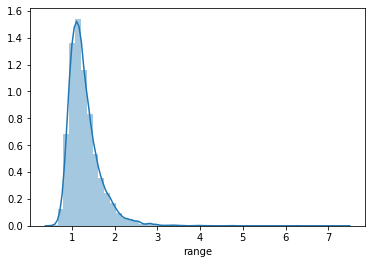

In [132]:
sns.distplot(df_range_merged.range)

In [130]:
df_range = (df_selective_essential.max()-df_selective_essential.min())
df_range.name = 'range'
dep_class.name = 'dep_class'
df_range_merged = pd.merge(df_range,dep_class, left_index=True, right_index=True)

In [131]:
sns.distplot(data=df_range_merged, x='range', hue='dep_class')

AttributeError: module 'seaborn' has no attribute 'histplot'